In [20]:
# import necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 400)

In [21]:
# load the dataset
df = pd.read_excel("C:/Users/ncc/Desktop/Dataset/Sales Data.xlsx")
df

,Sales Person,Geography,Product,Date,Amount,Boxes
0,Barr Faughny,New Zealand,Raspberry Choco,2021-01-01,8414,495
1,Dennison Crosswaite,Canada,White Choc,2021-01-01,532,54
2,Karlen McCaffrey,USA,99% Dark & Pure,2021-01-01,5376,269
3,Barr Faughny,New Zealand,Baker's Choco Chips,2021-01-01,259,22
4,Beverie Moffet,USA,Manuka Honey Choco,2021-01-01,5530,179
...,...,...,...,...,...,...
3786,Van Tuxwell,India,Drinking Coco,2022-01-19,10682,1526
3787,Rafaelita Blaksland,Australia,Mint Chip Choco,2022-01-18,11746,511
3788,Kelci Walkden,Australia,Spicy Special Slims,2022-01-03,8862,1477
3789,Gunar Cockshoot,New Zealand,Mint Chip Choco,2022-01-21,11592,527


## Basic Info of the Dataset

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791 entries, 0 to 3790
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sales Person  3791 non-null   object        
 1   Geography     3791 non-null   object        
 2   Product       3791 non-null   object        
 3   Date          3791 non-null   datetime64[ns]
 4   Amount        3791 non-null   int64         
 5   Boxes         3791 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 177.8+ KB


In [23]:
df.describe()

,Date,Amount,Boxes
count,3791,3791.000000,3791.000000
mean,2021-07-24 07:40:22.474281472,5724.537589,354.675284
min,2021-01-01 00:00:00,0.000000,0.000000
25%,2021-04-08 00:00:00,2352.000000,120.500000
50%,2021-07-23 00:00:00,4844.000000,265.000000
75%,2021-11-12 00:00:00,8302.000000,480.000000
max,2022-01-31 00:00:00,23268.000000,3075.000000
std,NaN,4296.484695,335.358698


In [24]:
df.isna().sum()

Sales Person    0
Geography       0
Product         0
Date            0
Amount          0
Boxes           0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.columns

Index(['Sales Person', 'Geography', 'Product', 'Date', 'Amount', 'Boxes'], dtype='object')

## Some Feature Engineering

In [27]:

df["Revenue"] = df["Amount"] * df["Boxes"]
df["Revenue"]

0        4164930
1          28728
2        1446144
3           5698
4         989870
          ...   
3786    16300732
3787     6002206
3788    13089174
3789     6108984
3790     1668401
Name: Revenue, Length: 3791, dtype: int64

In [28]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month_name()
df


,Sales Person,Geography,Product,Date,Amount,Boxes,Revenue,Year,Month
0,Barr Faughny,New Zealand,Raspberry Choco,2021-01-01,8414,495,4164930,2021,January
1,Dennison Crosswaite,Canada,White Choc,2021-01-01,532,54,28728,2021,January
2,Karlen McCaffrey,USA,99% Dark & Pure,2021-01-01,5376,269,1446144,2021,January
3,Barr Faughny,New Zealand,Baker's Choco Chips,2021-01-01,259,22,5698,2021,January
4,Beverie Moffet,USA,Manuka Honey Choco,2021-01-01,5530,179,989870,2021,January
...,...,...,...,...,...,...,...,...,...
3786,Van Tuxwell,India,Drinking Coco,2022-01-19,10682,1526,16300732,2022,January
3787,Rafaelita Blaksland,Australia,Mint Chip Choco,2022-01-18,11746,511,6002206,2022,January
3788,Kelci Walkden,Australia,Spicy Special Slims,2022-01-03,8862,1477,13089174,2022,January
3789,Gunar Cockshoot,New Zealand,Mint Chip Choco,2022-01-21,11592,527,6108984,2022,January


## Data Cleaning

In [29]:
df["Geography"] = df["Geography"].str.strip()
df["Product"] = df["Product"].str.replace("99% -Dark & Pure","99% Dark & Pure")
df["Product"] = df["Product"].str.replace("White-Choc","White Choc")
df["Product"] = df["Product"].str.replace("Manuka Honey Chocos","Manuka Honey Choco")
df["Sales Person"] = df["Sales Person"].str.replace("Ches Bonnell*","Ches Bonnell")

## Generating insight from the Dataset

In [30]:
df["Geography"].unique()

array(['New Zealand', 'Canada', 'USA', 'India', 'UK', 'Australia'],
      dtype=object)

In [31]:
df["Geography"].value_counts().head(10)

Geography
New Zealand    647
Canada         643
UK             636
India          629
Australia      627
USA            609
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

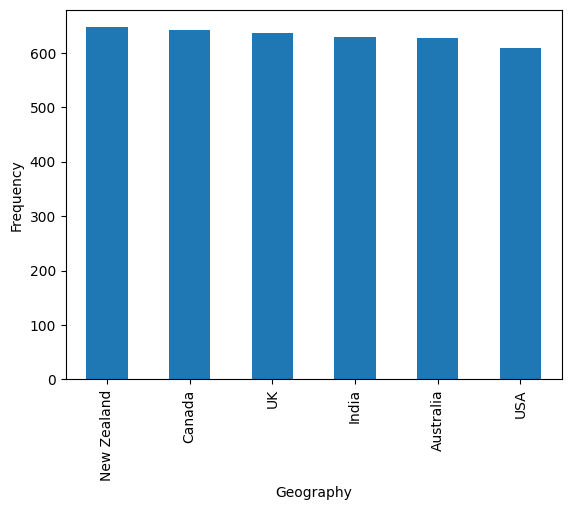

In [46]:
df["Geography"].value_counts().head(10).plot(kind = 'bar')
plt.ylabel("Frequency")

In [33]:
rev_by_location =  df.groupby(["Geography"])["Revenue"].sum().sort_values(ascending=False)
rev_by_location

Geography
India          2234182748
New Zealand    2084411952
Australia      2009204904
Canada         1954810389
UK             1922557252
USA            1878754248
Name: Revenue, dtype: int64

In [34]:
# Exploring India since it has the higest generated revenue
df_india = df.loc[(df["Geography"] == "India")]
df_india.head(5)


,Sales Person,Geography,Product,Date,Amount,Boxes,Revenue,Year,Month
5,Rafaelita Blaksland,India,85% Dark Bars,2021-01-01,2184,122,266448,2021,January
14,Brien Boise,India,Eclairs,2021-01-01,15596,975,15206100,2021,January
15,Curtice Advani,India,After Nines,2021-01-01,8561,330,2825130,2021,January
31,Van Tuxwell,India,Organic Choco Syrup,2021-01-05,17248,664,11452672,2021,January
40,Jan Morforth,India,Orange Choco,2021-01-05,3059,279,853461,2021,January


In [35]:
#  top 10 product generating higest revenue in india
Hig_rev_by_prodct_in_india = df_india.groupby(["Product"])["Revenue"].sum().head(10).sort_values(ascending=False)
Hig_rev_by_prodct_in_india

Product
85% Dark Bars           182334957
Baker's Choco Chips     147460593
70% Dark Bites          125877346
50% Dark Bites          104700470
Drinking Coco            94609739
Almond Choco             85474172
Caramel Stuffed Bars     77184933
Choco Coated Almonds     71886647
99% Dark & Pure          64986446
After Nines              63101857
Name: Revenue, dtype: int64

Text(0.5, 1.0, 'Top Ten Product in India')

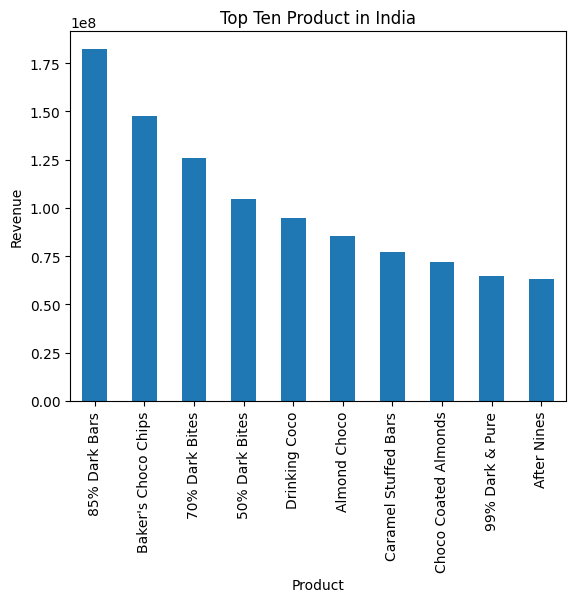

In [36]:
df_india.groupby(["Product"])["Revenue"].sum().head(10).sort_values(ascending=False).plot(kind = "bar")
plt.ylabel("Revenue")
plt.title("Top Ten Product in India")


In [39]:
# Sales agent with higest revenue
sales_agent_by_rev =  df_india.groupby(["Sales Person"])["Revenue"].sum().head(10).sort_values(ascending=False)
sales_agent_by_rev

Sales Person
Curtice Advani         124768301
Ches Bonnell           109542930
Barr Faughny           102911795
Beverie Moffet          99692460
Andria Kimpton          82759019
Dotty Strutley          65596349
Gigi Bohling            64850191
Dennison Crosswaite     63065821
Camilla Castle          55130474
Brien Boise             53921070
Name: Revenue, dtype: int64

Text(0.5, 1.0, 'Top 10 Sales Person in India')

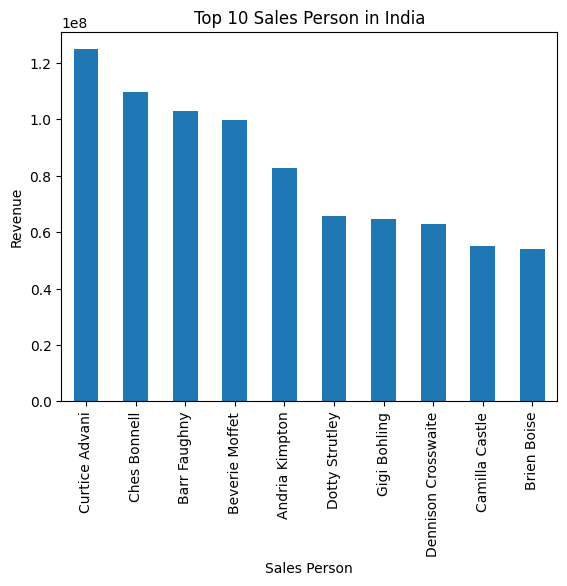

In [42]:
df_india.groupby(["Sales Person"])["Revenue"].sum().head(10).sort_values(ascending=False).plot(kind = "bar")
plt.ylabel("Revenue")
plt.title("Top 10 Sales Person in India")

In [48]:
df["Product"].nunique()

22

In [ ]:
df["Product"].value_counts()

Product
99% Dark & Pure         179
Organic Choco Syrup     178
White Choc              177
Peanut Butter Cubes     176
Manuka Honey Choco      175
After Nines             175
Orange Choco            175
Caramel Stuffed Bars    175
85% Dark Bars           174
Raspberry Choco         173
Baker's Choco Chips     173
Choco Coated Almonds    172
Fruit & Nut Bars        172
Spicy Special Slims     171
Smooth Sliky Salty      170
Eclairs                 170
Milk Bars               170
50% Dark Bites          170
Mint Chip Choco         168
Almond Choco            168
Drinking Coco           167
70% Dark Bites          163
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

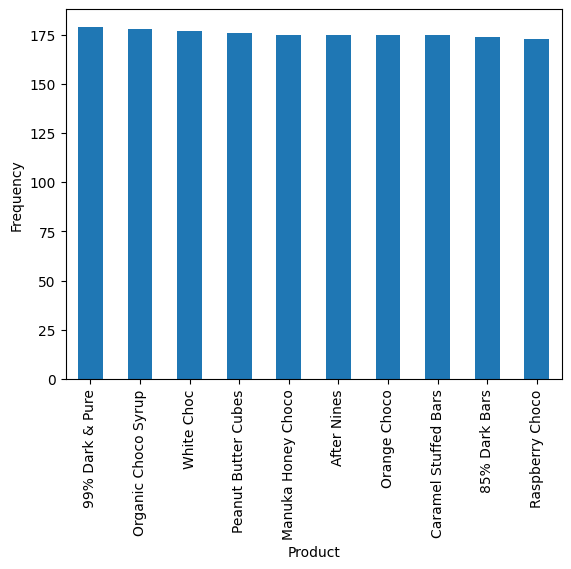

In [47]:
df["Product"].value_counts().head(10).plot(kind = 'bar')
plt.ylabel("Frequency")

In [ ]:
df["Sales Person"].unique()

array(['Barr Faughny', 'Dennison Crosswaite', 'Karlen McCaffrey',
       'Beverie Moffet', 'Rafaelita Blaksland', 'Oby Sorrel',
       'Dotty Strutley', 'Brien Boise', 'Curtice Advani',
       'Madelene Upcott', "Wilone O'Kielt", 'Jehu Rudeforth',
       'Camilla Castle', 'Andria Kimpton', 'Kelci Walkden',
       'Husein Augar', 'Van Tuxwell', "Marney O'Breen", 'Kaine Padly',
       'Jan Morforth', 'Ches Bonnell', 'Gunar Cockshoot', 'Gigi Bohling',
       'Roddy Speechley', 'Mallorie Waber'], dtype=object)

In [ ]:
df["Sales Person"].value_counts()

Sales Person
Brien Boise            160
Van Tuxwell            157
Dotty Strutley         156
Wilone O'Kielt         156
Dennison Crosswaite    156
Beverie Moffet         155
Karlen McCaffrey       155
Roddy Speechley        154
Andria Kimpton         154
Gunar Cockshoot        153
Madelene Upcott        153
Kelci Walkden          152
Marney O'Breen         152
Mallorie Waber         152
Gigi Bohling           152
Ches Bonnell           151
Barr Faughny           150
Jan Morforth           150
Jehu Rudeforth         149
Camilla Castle         148
Rafaelita Blaksland    147
Husein Augar           146
Oby Sorrel             146
Curtice Advani         145
Kaine Padly            142
Name: count, dtype: int64

In [ ]:
total_boxes = df["Boxes"].sum()
total_boxes

np.int64(1344574)

In [ ]:
product_by_rev = df.groupby(["Product"])["Revenue"].sum().sort_values(ascending=False)
product_by_rev

Product
Orange Choco            887893622
50% Dark Bites          830915722
White Choc              784010962
70% Dark Bites          739920153
Baker's Choco Chips     664557355
Fruit & Nut Bars        659079008
85% Dark Bars           583281937
99% Dark & Pure         574641942
Eclairs                 574003577
Choco Coated Almonds    569210635
Spicy Special Slims     524377693
Smooth Sliky Salty      521539018
Raspberry Choco         502882464
Almond Choco            466655665
Mint Chip Choco         458790101
Drinking Coco           454337625
Peanut Butter Cubes     450318806
Caramel Stuffed Bars    430618363
Organic Choco Syrup     406281421
After Nines             352091838
Milk Bars               330087597
Manuka Honey Choco      318425989
Name: Revenue, dtype: int64